In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_19373.csv",skiprows=4)
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [3]:
year = '2023'
df_2023 = df[['Country Name', year]].dropna()

exclude_keywords = ['income', 'IBRD', 'IDA', 'World', 'OECD', 'Africa', 'Asia', 
                    'Europe', 'Latin America', 'Caribbean', 'Arab', 'countries', 'Pacific','Early-demographic dividend','Late-demographic dividend',
                    'Post-demographic dividend','Pre-demographic dividend','Fragile and conflict affected situations','North America','Euro area']

mask = ~df_2023['Country Name'].str.contains('|'.join(exclude_keywords), case=False)
df_countries_only = df_2023[mask]


df_top10 = df_countries_only.sort_values(by=year, ascending=False).head(10)
df_top10


,Country Name,2023
109,India,1.438070e+09
40,China,1.410710e+09
251,United States,3.349149e+08
106,Indonesia,2.811901e+08
184,Pakistan,2.475045e+08
174,Nigeria,2.278829e+08
29,Brazil,2.111407e+08
20,Bangladesh,1.714670e+08
202,Russian Federation,1.438261e+08
154,Mexico,1.297398e+08


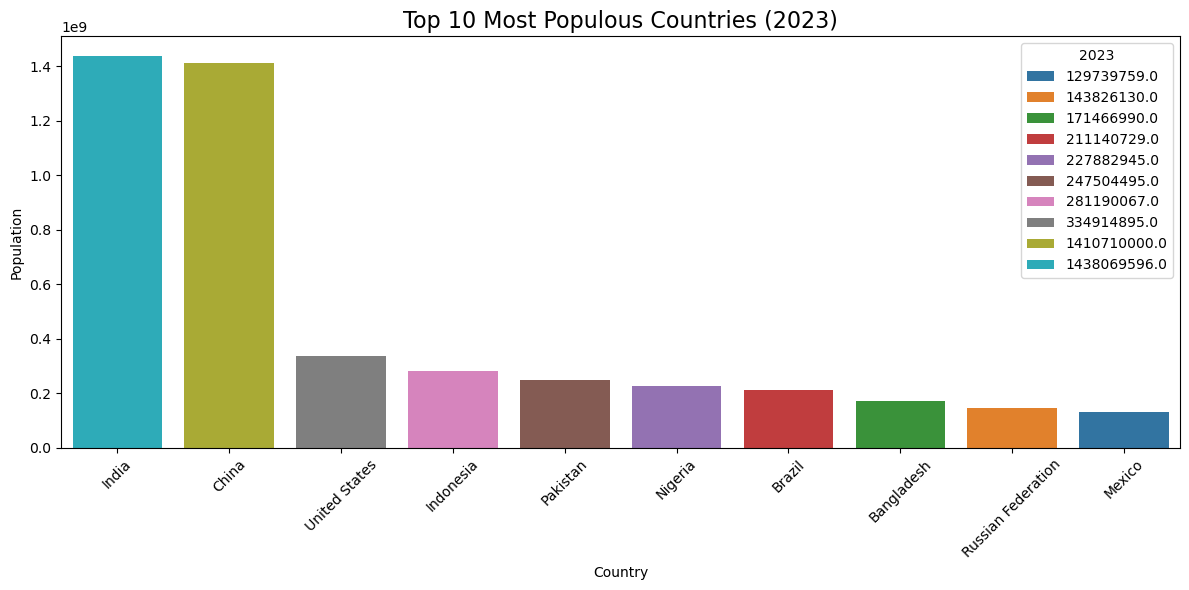

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top10, x='Country Name', y=year,hue=year,palette="tab10")
plt.title('Top 10 Most Populous Countries (2023)', fontsize=16)
plt.ylabel('Population')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()